# AMCAT DATA ANALYSIS
Data Description: The dataset contains 3998 entries with 39 columns related to students' academic performance and personal details. The relevant columns include:

* ID: Unique identifier for each entry
* Salary: Salary of the graduates (in lakhs)
* DOJ: Date of Joining the job
* DOL: Date of Leaving the job
* Designation: Job titles of graduates
* Gender: Gender of the graduates
* Specialization: Field of specialization
* collegeGPA: College Grade Point Average
* Other academic performance metrics: Including scores in different subjects.

In [211]:
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [212]:
data=pd.read_excel("data.xlsx")

In [213]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [214]:
data.tail()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943
3997,train,324966,400000,2013-02-01,present,senior systems engineer,Chennai,f,1991-02-26,70.60,...,-1,-1,-1,-1,-1,-1.1128,-0.2793,-0.6343,1.32553,-0.6035


In [215]:
data.shape

(3998, 39)

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

#  Data Cleaning

In [217]:
data.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [218]:
data.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [219]:
data.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [220]:
data.sample(5)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
2613,281946,150000,2011-06-01,2012-03-01 00:00:00,maintenance engineer,New Delhi,m,1986-08-07,65.16,up board,...,-1,-1,-1,313,-1,-0.1082,1.1248,-1.3599,-0.52530,0.3444
1028,353118,415000,2013-08-01,present,systems engineer,Bangalore,m,1990-08-09,79.86,kseeb,...,-1,-1,-1,-1,-1,1.3215,0.3448,-0.4891,-1.23030,0.3444
2038,924753,325000,2014-06-01,present,systems engineer,Hyderabad,m,1992-09-01,96.00,icse,...,469,-1,-1,-1,-1,-0.4463,1.2114,0.9322,1.16010,-0.0943
3399,823040,300000,2014-11-01,present,programmer,Hyderabad,m,1991-09-05,86.00,cbse,...,-1,-1,-1,-1,-1,-0.7335,-0.9531,-1.8344,0.01920,-2.5853
808,326418,180000,2014-03-01,present,technical recruiter,Bhopal,m,1991-03-05,78.40,mpboard,...,-1,-1,-1,260,-1,-0.2628,0.6178,0.3817,1.58993,-0.2875


In [221]:
data.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [222]:
data.duplicated().sum()

0

In [223]:
data["DOL"]=data["DOL"].apply(lambda x: "Left" if x!="present" else x)

In [224]:
data["DOL"].value_counts()

Left       2123
present    1875
Name: DOL, dtype: int64

In [225]:
data['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

In [226]:
data["collegeGPA"].mean()

71.48617058529268

In [227]:
data["collegeGPA"].max()

99.93

In [228]:
data["Salary"].mean()

307699.8499249625

In [229]:
data["Salary"].max()

4000000

In [230]:
data["Salary"].describe()

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

# Univariate analysis

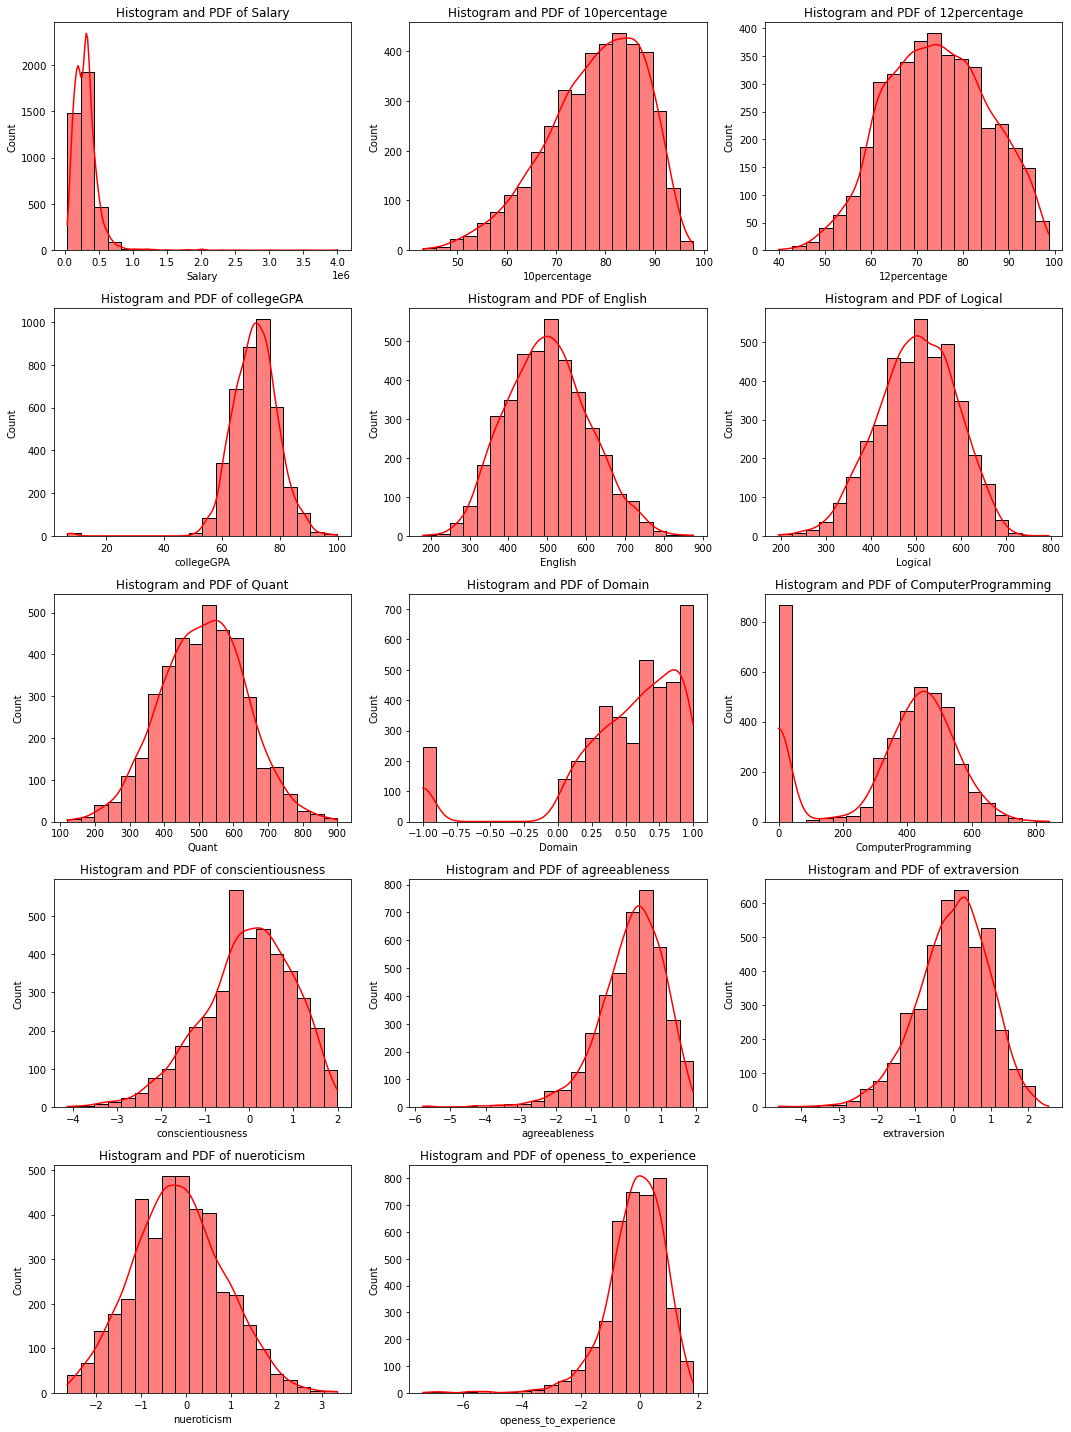

In [231]:

numerical_columns = ['Salary', '10percentage', '12percentage', 'collegeGPA', 
                     'English', 'Logical', 'Quant', 'Domain', 
                     'ComputerProgramming', 'conscientiousness', 'agreeableness', 
                     'extraversion', 'nueroticism', 'openess_to_experience']


plt.figure(figsize=(15, 20))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)  
    sns.histplot(data[column], kde=True, bins=20, color='red')
    plt.title(f'Histogram and PDF of {column}')

plt.tight_layout()  
plt.show()


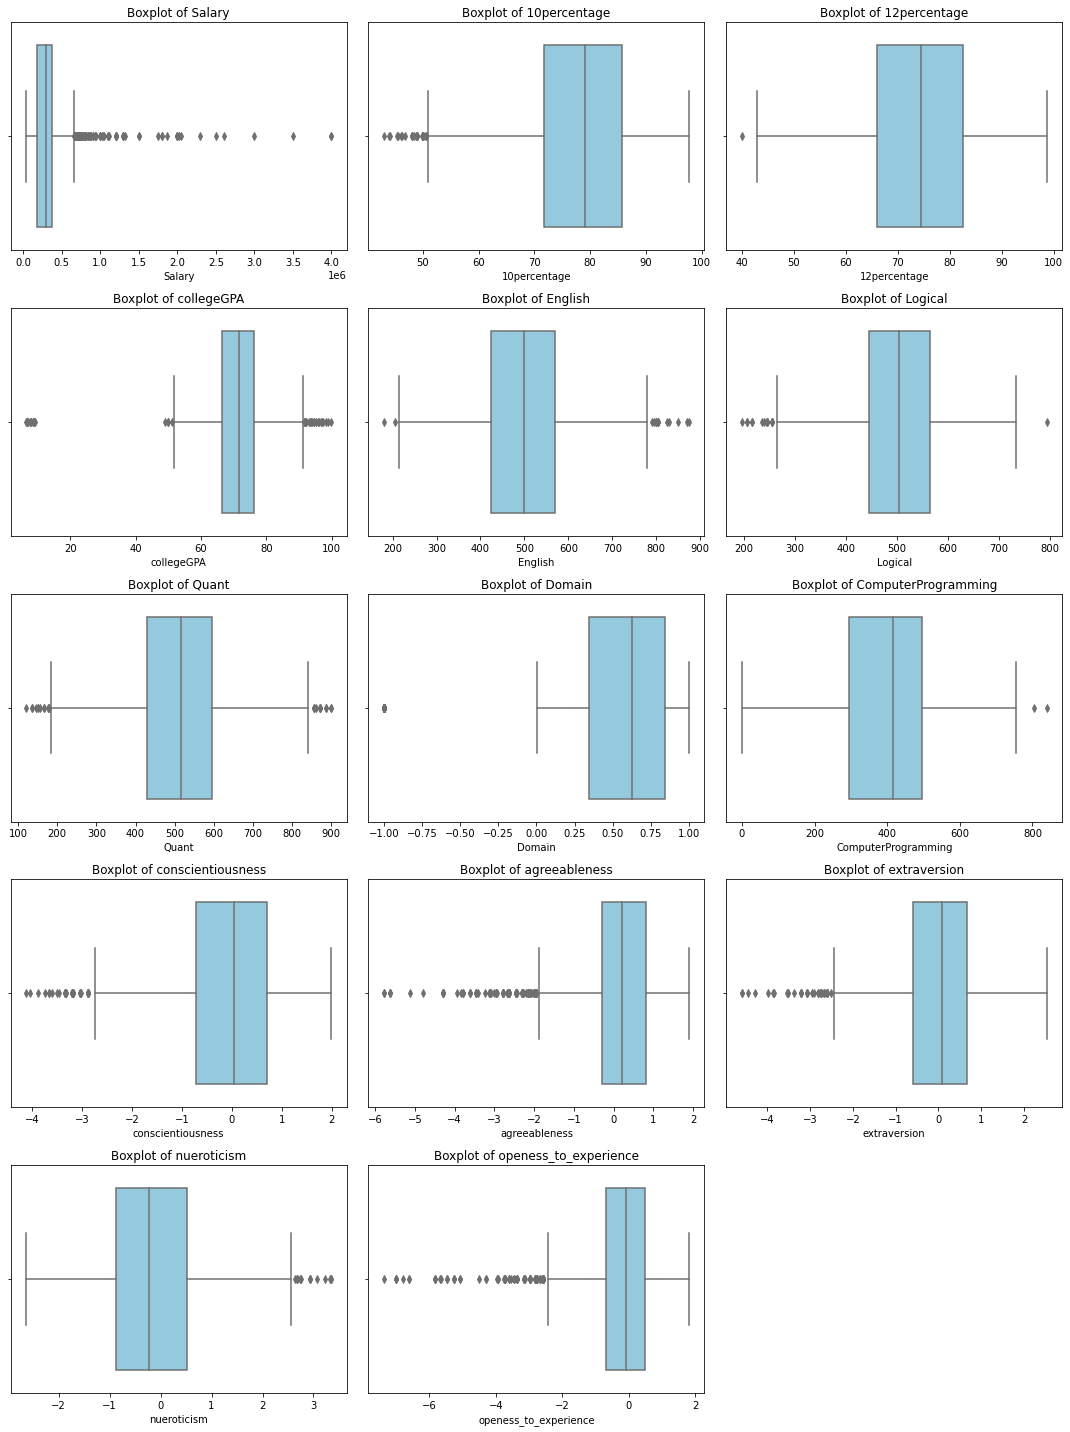

In [232]:
plt.figure(figsize=(15, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)  
    sns.boxplot(x=data[column], color='skyblue')
    plt.title(f'Boxplot of {column}')

plt.tight_layout() 
plt.show()


In [233]:
specialization = data['Specialization'].value_counts().sort_values(ascending=False).head(10)
specialization


electronics and communication engineering    880
computer science & engineering               744
information technology                       660
computer engineering                         600
computer application                         244
mechanical engineering                       201
electronics and electrical engineering       196
electronics & telecommunications             121
electrical engineering                        82
electronics & instrumentation eng             32
Name: Specialization, dtype: int64

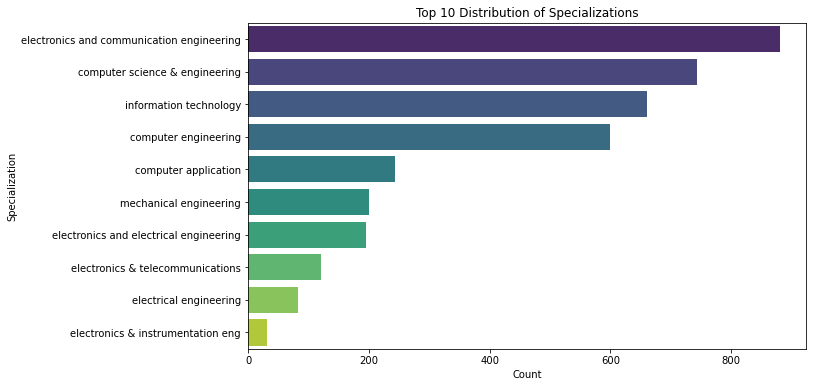

In [234]:
plt.figure(figsize=(10, 6))
sns.barplot(x=specialization.values, y=specialization.index, palette='viridis')
plt.title('Top 10 Distribution of Specializations')
plt.xlabel('Count')
plt.ylabel('Specialization')
plt.show()



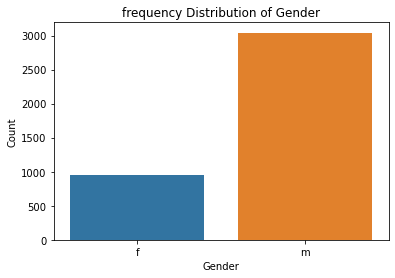

In [235]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender')
plt.title('frequency Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


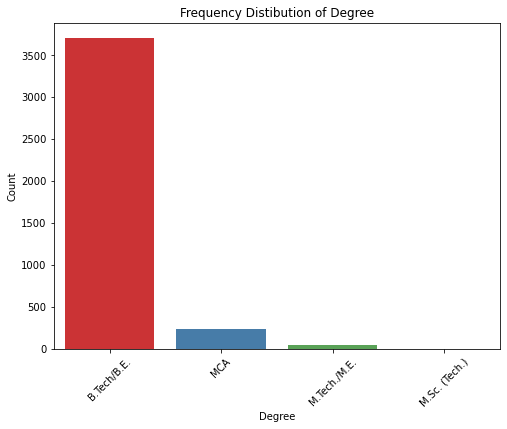

In [236]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Degree', palette='Set1')
plt.title('Frequency Distibution of Degree')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()


In [237]:
state=data["CollegeState"].value_counts().sort_values(ascending=False)
filtered_states=state[state>100]

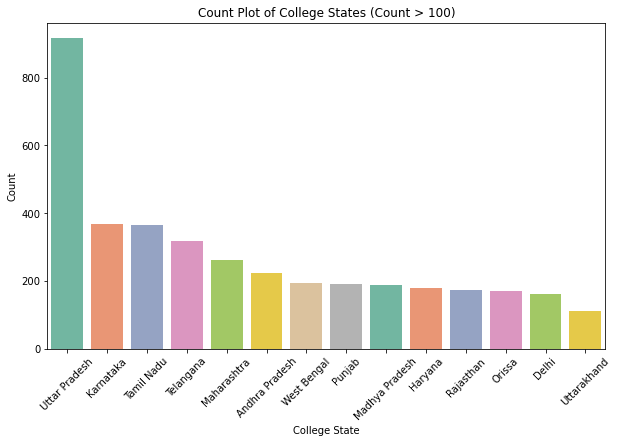

In [238]:
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_states.index, y=filtered_states.values, palette='Set2')
plt.title('Count Plot of College States (Count > 100)')
plt.xlabel('College State')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()


In [239]:
designation=data["Designation"].value_counts().sort_values(ascending=False).head(10)
designation

software engineer             539
software developer            265
system engineer               205
programmer analyst            139
systems engineer              118
java software engineer        111
software test engineer        100
project engineer               77
technical support engineer     76
senior software engineer       72
Name: Designation, dtype: int64

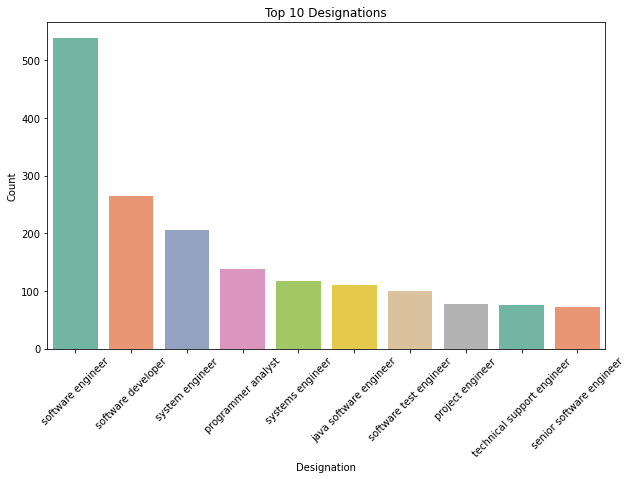

In [240]:
plt.figure(figsize=(10, 6))
sns.barplot(x=designation.index, y=designation.values, palette='Set2')
plt.title('Top 10 Designations')
plt.xlabel('Designation')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()


In [241]:
data["JobCity"].value_counts(ascending=False).head(10)

Bangalore    627
-1           461
Noida        368
Hyderabad    335
Pune         290
Chennai      272
Gurgaon      198
New Delhi    196
Mumbai       108
Kolkata       98
Name: JobCity, dtype: int64

# Bivariate Analysis

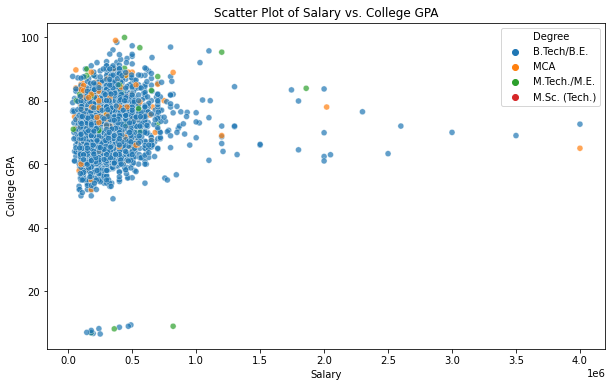

In [242]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Salary', y='collegeGPA', hue='Degree', alpha=0.7)
plt.title('Scatter Plot of Salary vs. College GPA')
plt.xlabel('Salary')
plt.ylabel('College GPA')
plt.show()


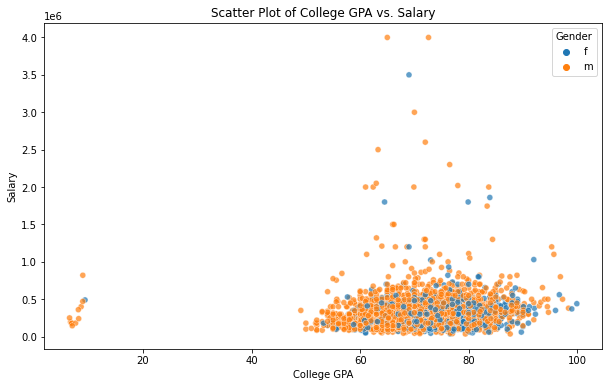

In [243]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='collegeGPA', y='Salary', hue='Gender', alpha=0.7)
plt.title('Scatter Plot of College GPA vs. Salary')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.show()


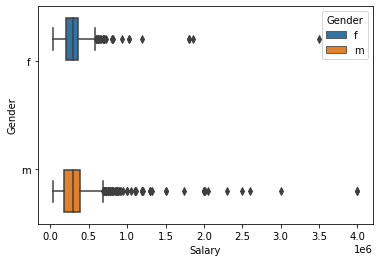

In [244]:
sns.boxplot(y=data["Gender"],x=data["Salary"],hue=data["Gender"])
plt.show()

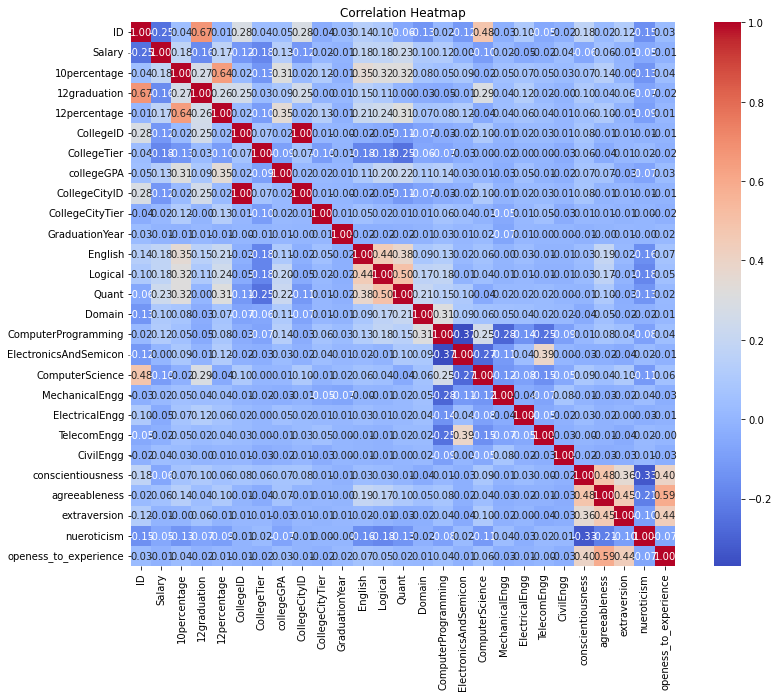

In [245]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


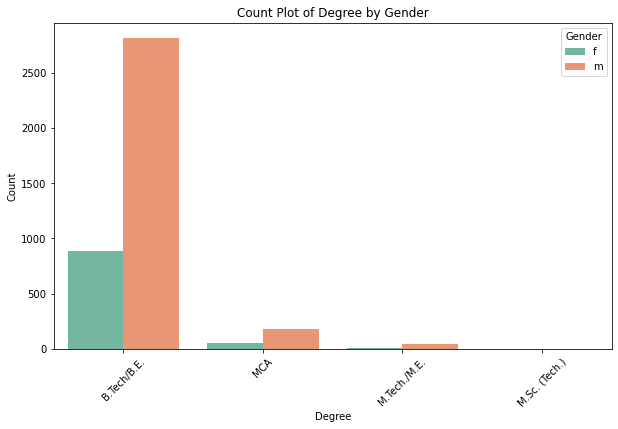

In [246]:
# Count plot for Gender vs. Degree
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Degree', hue='Gender', palette='Set2')
plt.title('Count Plot of Degree by Gender')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


In [247]:
gpa=data.groupby("Specialization")["collegeGPA"].mean().sort_values(ascending=False).head(10)
gpa

Specialization
embedded systems technology                88.000000
control and instrumentation engineering    82.100000
information science                        81.200000
internal combustion engine                 80.600000
industrial & management engineering        80.000000
computer science                           77.385000
computer and communication engineering     77.260000
power systems and automation               76.000000
other                                      75.619231
metallurgical engineering                  75.550000
Name: collegeGPA, dtype: float64

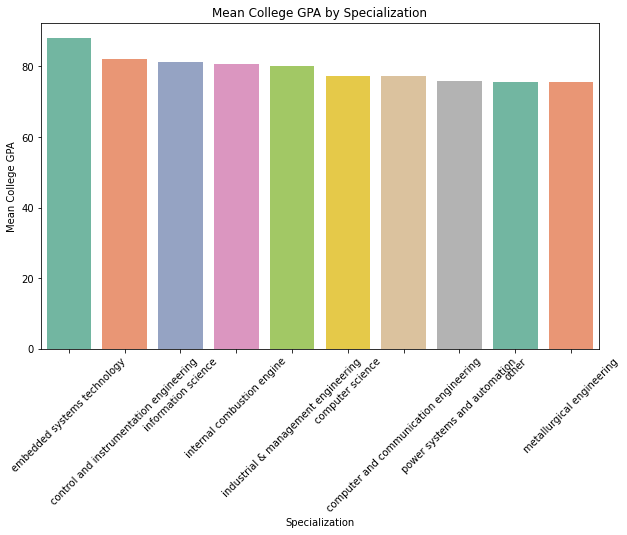

In [248]:
# Create a bar plot for the mean college GPA by Specialization
plt.figure(figsize=(10, 6))
sns.barplot(x=gpa.index, y=gpa.values, palette='Set2')
plt.title('Mean College GPA by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Mean College GPA')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()


In [249]:
df=data.groupby("Designation")[["Salary"]].mean()
df

,Salary
Designation,
.net developer,223382.352941
.net web developer,196250.000000
account executive,287500.000000
account manager,350000.000000
admin assistant,102500.000000
...,...
web designer and seo,200000.000000
web developer,168981.481481
web intern,205000.000000


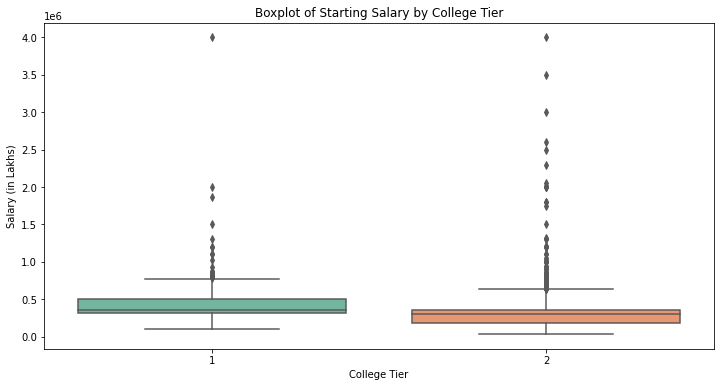

In [250]:

plt.figure(figsize=(12, 6))

# Create a boxplot for Salary across different College Tiers
sns.boxplot(x='CollegeTier', y='Salary', data=data, palette='Set2')
plt.title('Boxplot of Starting Salary by College Tier')
plt.xlabel('College Tier')
plt.ylabel('Salary (in Lakhs)')
plt.xticks(rotation=0)
plt.show()


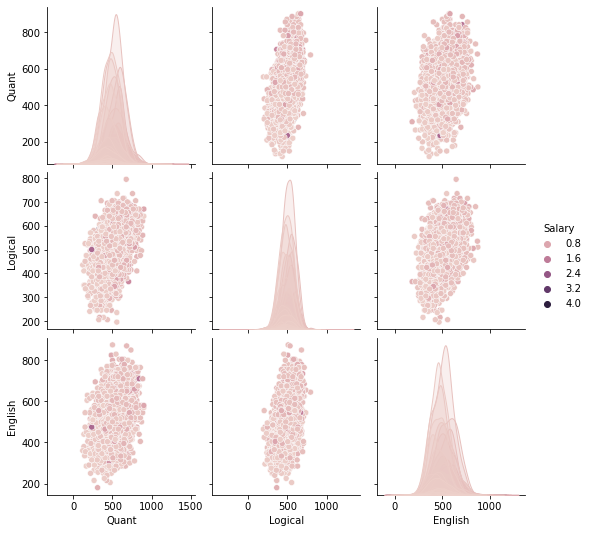

In [251]:
sns.pairplot(data,vars=["Quant","Logical","English"],hue="Salary")
plt.show()

#  Research question

In [252]:
job_roles = ['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer']

mean_salaries = data[data['Designation'].isin(job_roles)].groupby('Designation')['Salary'].mean()
print(mean_salaries)


Designation
associate engineer    290000.000000
hardware engineer     281250.000000
programmer analyst    339784.172662
software engineer     341215.213358
Name: Salary, dtype: float64


In [253]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Gender'], data['Specialization'])

# Perform the Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p}")


Chi-Squared Statistic: 104.46891913608455
P-Value: 1.2453868176976918e-06


# Conclusion
Summarize the findings from your EDA, including:

* Verification of the earnings claim.
* Insights into gender preferences for specializations.
* Any notable patterns or trends observed during the analysis.